In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn

In [2]:
seaborn.set_style("whitegrid")
seaborn.set_context("paper")
seaborn.set_palette("deep", color_codes = True)

In [3]:
data = pandas.read_pickle("../data/processed.pkl.gz")

In [4]:
data

,MRI_ID,delay,sex,hand,age,YOE,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0001_MR1,0,M,R,87,14,2,27.0,none,1987.0,0.696,0.883
1,0001_MR2,457,M,R,88,14,2,30.0,none,2004.0,0.681,0.876
2,0002_MR1,0,M,R,75,12,2,23.0,very mild,1678.0,0.736,1.046
3,0002_MR2,560,M,R,76,12,2,28.0,very mild,1738.0,0.713,1.010
4,0002_MR3,1895,M,R,77,12,2,22.0,very mild,1698.0,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...
368,0149_MR2,842,M,R,81,16,1,28.0,very mild,1693.0,0.694,1.037
369,0149_MR3,2297,M,R,82,16,1,26.0,very mild,1688.0,0.675,1.040
370,0150_MR1,0,F,R,61,13,2,30.0,none,1319.0,0.801,1.331
371,0150_MR2,763,F,R,62,13,2,30.0,none,1327.0,0.796,1.323


# Data Exploration

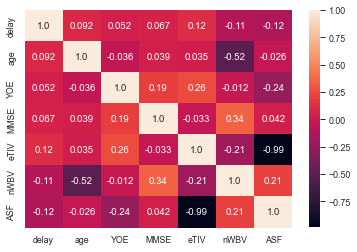

In [5]:
fig, p = plt.subplots()
seaborn.heatmap(data.corr(), data = data, annot = True, fmt = ".2", ax = p)
fig.savefig("../results/heatmap.png", dpi = 150, bbox_inches = "tight")

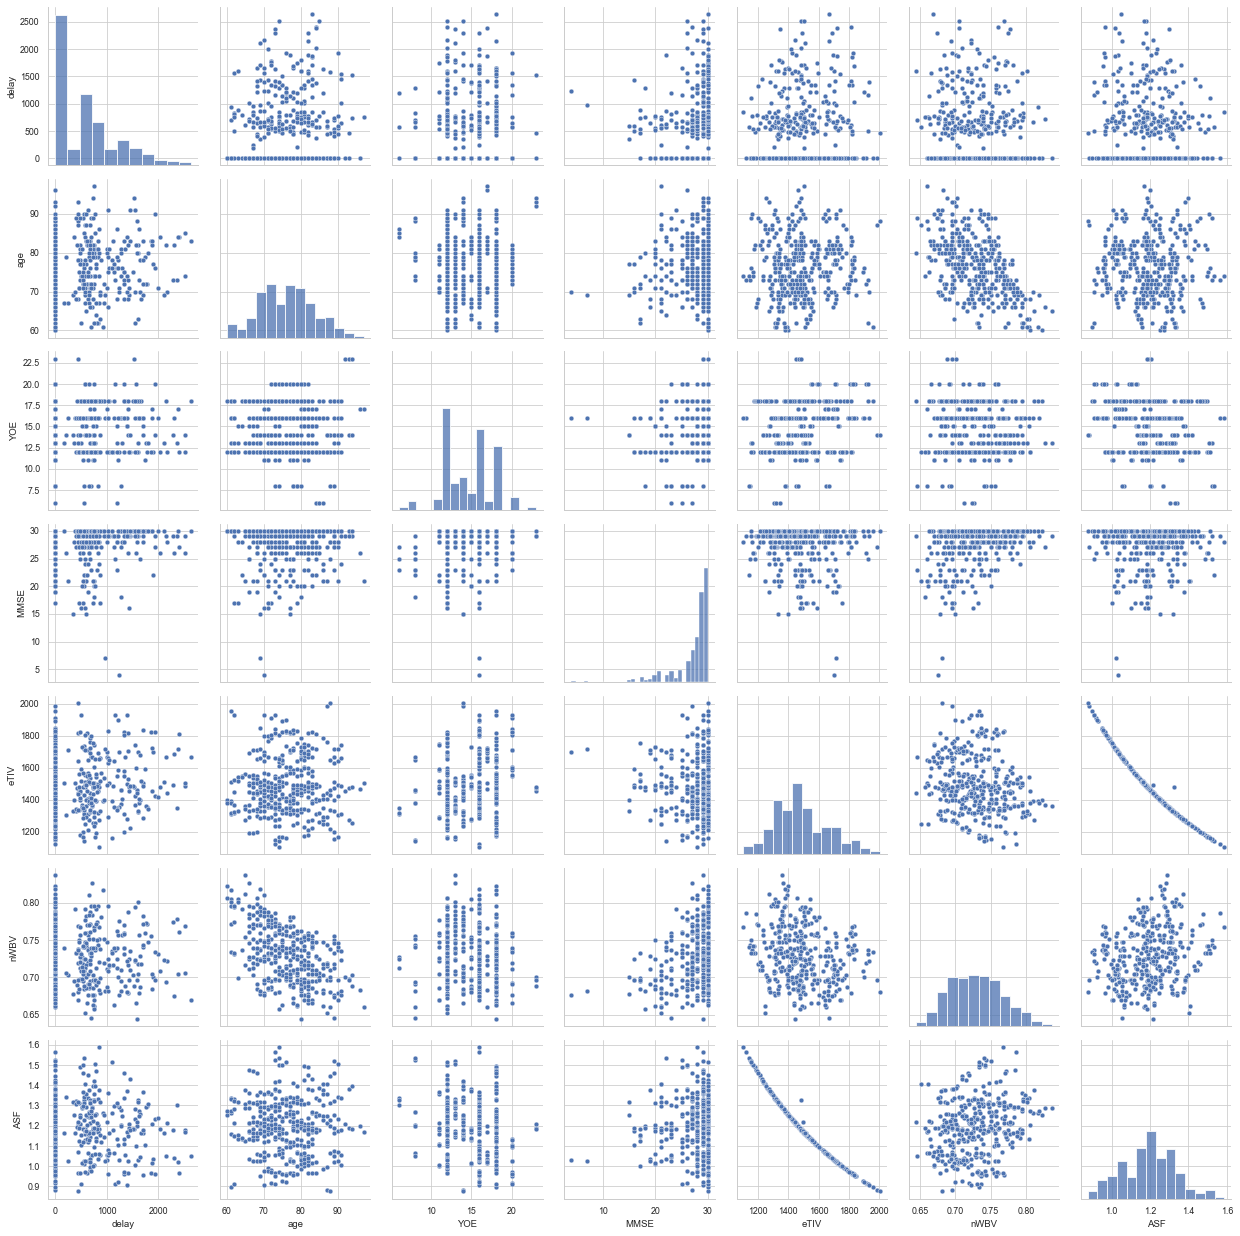

In [6]:
columns = ["delay", "age", "YOE", "MMSE", "eTIV", "nWBV", "ASF"]
grid = seaborn.PairGrid(vars = columns, data = data)
grid.map_diag(seaborn.histplot)
grid.map_offdiag(seaborn.scatterplot)
grid.savefig("../results/scatter.png", dpi = 150, bbox_inches = "tight")

# How diverse is the patient population

In [7]:
data.sex.value_counts()

F    213
M    160
Name: sex, dtype: int64

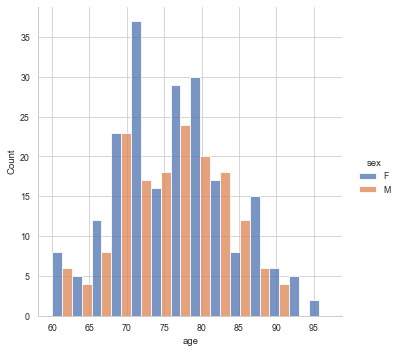

In [8]:
grid = seaborn.displot(x = "age", hue = "sex", multiple = "dodge", data = data)
grid.savefig("../results/agesex.png", dpi = 150, bbox_inches = "tight")

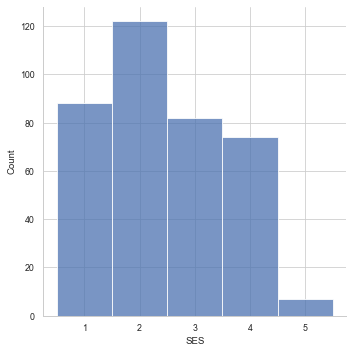

In [9]:
grid = seaborn.displot(x = "SES", data = data)
grid.savefig("../results/SES.png", dpi = 150, bbox_inches = "tight")

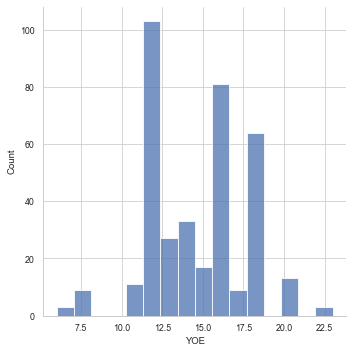

In [10]:
grid = seaborn.displot(x = "YOE", data = data)
grid.savefig("../results/YOE.png", dpi = 150, bbox_inches = "tight")

# How the patients progressed over time

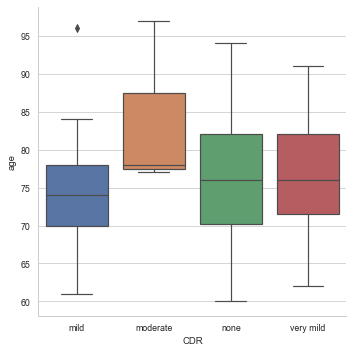

In [11]:
grid = seaborn.catplot(x = "CDR", y = "age", kind = "box", data = data)
grid.figure.savefig("../results/CDRAGE.png", dpi = 150, bbox_inches = "tight")

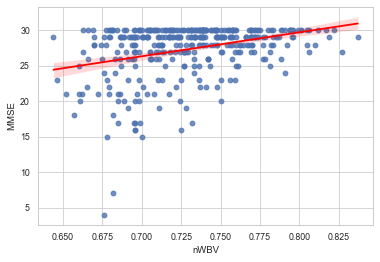

In [12]:
fig, p = plt.subplots()
seaborn.regplot(x = "nWBV", y = "MMSE", data = data, ax = p, line_kws={"color": "red"})
fig.savefig("../results/nWBVMMSE.png", dpi = 150, bbox_inches = "tight")

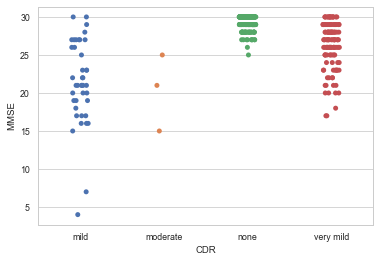

In [13]:
grid = seaborn.stripplot(x = "CDR", y = "MMSE", data=data)
grid.figure.savefig("../results/MMSECDR.png", dpi = 150, bbox_inches = "tight")

# Clustering

In [14]:
# need to encode sex to apply models, male = 0, female = 1
data["sex"] = data["sex"].factorize()[0]

In [15]:
data = data.drop(["MRI_ID", "hand"], axis = 1)

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
x = data
y = data.CDR

In [18]:
le = LabelEncoder()
x["CDR"] = le.fit_transform(x.CDR)
y = le.transform(y)

In [19]:
scaler = StandardScaler()
x = pandas.DataFrame(scaler.fit_transform(x), columns=scaler.feature_names_in_)

In [20]:
x

,delay,sex,age,YOE,SES,MMSE,CDR,eTIV,nWBV,ASF
0,-0.937715,-1.153798,1.437713,-0.208132,-0.394466,-0.094194,-0.116318,2.837036,-0.905169,-2.266857
1,-0.217613,-1.153798,1.571612,-0.208132,-0.394466,0.722880,-0.116318,2.933793,-1.309643,-2.317619
2,-0.937715,-1.153798,-0.169079,-0.904394,-0.394466,-1.183625,1.025439,1.078335,0.173429,-1.084845
3,-0.055315,-1.153798,-0.035180,-0.904394,-0.394466,0.178164,1.025439,1.419830,-0.446765,-1.345903
4,2.048264,-1.153798,0.098719,-0.904394,-0.394466,-1.455983,1.025439,1.192167,-0.770344,-1.171864
...,...,...,...,...,...,...,...,...,...,...
368,0.389037,-1.153798,0.634317,0.488130,-1.297140,0.178164,1.025439,1.163709,-0.959099,-1.150109
369,2.681702,-1.153798,0.768216,0.488130,-1.297140,-0.366551,1.025439,1.135251,-1.471432,-1.128355
370,-0.937715,0.866703,-2.043670,-0.556263,-0.394466,0.722880,-0.116318,-0.964946,1.926149,0.981864
371,0.264555,0.866703,-1.909770,-0.556263,-0.394466,0.722880,-0.116318,-0.919413,1.791325,0.923851


In [21]:
pca = PCA(3)

In [22]:
x = pca.fit_transform(x)

In [23]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(x)

KMeans(n_clusters=4, random_state=0)

In [24]:
kmeans.cluster_centers_

array([[-0.41692033,  2.05780382, -0.36822467],
       [ 0.78455307, -0.12149062,  1.18228918],
       [-2.22343811, -0.53806536, -0.17197869],
       [ 1.31829296, -0.67165679, -0.9524377 ]])

In [25]:
kmeans.inertia_

905.8789119939602

In [26]:
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 107 out of 373 samples were correctly labeled.


In [27]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.29


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


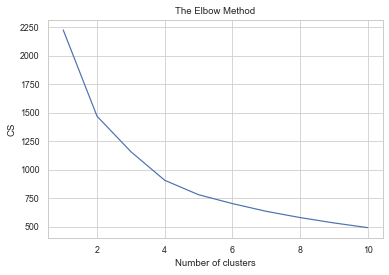

In [28]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.savefig("../results/elbow.png", dpi = 150, bbox_inches = "tight")

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [30]:
y = data.CDR
x = data.drop("CDR", axis=1)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [32]:
logit = LogisticRegression(solver= "lbfgs", max_iter=99999999)

In [33]:
logit.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=99999999)

In [34]:
preds = logit.predict(x_test)

In [35]:
from sklearn import metrics

In [36]:
report = metrics.classification_report(y_test, preds)

In [37]:
print(report)

              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           2       0.87      0.92      0.89        49
           3       0.50      0.44      0.47        18

    accuracy                           0.76        75
   macro avg       0.65      0.62      0.63        75
weighted avg       0.75      0.76      0.75        75



In [38]:
accuracy_score(y_test, preds)

0.76

# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
data

,delay,sex,age,YOE,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,87,14,2,27.0,2,1987.0,0.696,0.883
1,457,0,88,14,2,30.0,2,2004.0,0.681,0.876
2,0,0,75,12,2,23.0,3,1678.0,0.736,1.046
3,560,0,76,12,2,28.0,3,1738.0,0.713,1.010
4,1895,0,77,12,2,22.0,3,1698.0,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,842,0,81,16,1,28.0,3,1693.0,0.694,1.037
369,2297,0,82,16,1,26.0,3,1688.0,0.675,1.040
370,0,1,61,13,2,30.0,2,1319.0,0.801,1.331
371,763,1,62,13,2,30.0,2,1327.0,0.796,1.323


In [41]:
encoded = data.astype("category")

In [42]:
encoded = encoded.apply(lambda x: x.cat.codes)

In [43]:
y = encoded.CDR

In [44]:
x = encoded.drop("CDR", axis = 1)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [46]:
dt = DecisionTreeClassifier(max_depth = 2)

In [47]:
predicted = dt.fit(x_train, y_train).predict(x_test)

In [48]:
report = metrics.classification_report(y_test, predicted)

In [49]:
print(report)

              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           2       0.85      0.90      0.87        49
           3       0.50      0.39      0.44        18

    accuracy                           0.76        75
   macro avg       0.67      0.68      0.67        75
weighted avg       0.74      0.76      0.75        75



In [50]:
from sklearn import tree

In [51]:
text = tree.export_text(dt, feature_names = x.columns.tolist())

In [52]:
print(text)

|--- MMSE <= 14.50
|   |--- MMSE <= 8.50
|   |   |--- class: 0
|   |--- MMSE >  8.50
|   |   |--- class: 3
|--- MMSE >  14.50
|   |--- sex <= 0.50
|   |   |--- class: 2
|   |--- sex >  0.50
|   |   |--- class: 2



# Cross Validation

In [53]:
data

,delay,sex,age,YOE,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,87,14,2,27.0,2,1987.0,0.696,0.883
1,457,0,88,14,2,30.0,2,2004.0,0.681,0.876
2,0,0,75,12,2,23.0,3,1678.0,0.736,1.046
3,560,0,76,12,2,28.0,3,1738.0,0.713,1.010
4,1895,0,77,12,2,22.0,3,1698.0,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,842,0,81,16,1,28.0,3,1693.0,0.694,1.037
369,2297,0,82,16,1,26.0,3,1688.0,0.675,1.040
370,0,1,61,13,2,30.0,2,1319.0,0.801,1.331
371,763,1,62,13,2,30.0,2,1327.0,0.796,1.323


In [54]:
data.CDR.unique()

array([2, 3, 0, 1])

In [55]:
y = data.CDR.apply(lambda x: 0 if x == 2 else 1)

In [56]:
y

0      0
1      0
2      1
3      1
4      1
      ..
368    1
369    1
370    0
371    0
372    0
Name: CDR, Length: 373, dtype: int64

In [57]:
x = data.drop("CDR", axis = 1)

In [58]:
x

,delay,sex,age,YOE,SES,MMSE,eTIV,nWBV,ASF
0,0,0,87,14,2,27.0,1987.0,0.696,0.883
1,457,0,88,14,2,30.0,2004.0,0.681,0.876
2,0,0,75,12,2,23.0,1678.0,0.736,1.046
3,560,0,76,12,2,28.0,1738.0,0.713,1.010
4,1895,0,77,12,2,22.0,1698.0,0.701,1.034
...,...,...,...,...,...,...,...,...,...
368,842,0,81,16,1,28.0,1693.0,0.694,1.037
369,2297,0,82,16,1,26.0,1688.0,0.675,1.040
370,0,1,61,13,2,30.0,1319.0,0.801,1.331
371,763,1,62,13,2,30.0,1327.0,0.796,1.323


In [59]:
from sklearn import linear_model, preprocessing, impute, pipeline

In [60]:
classifier = linear_model.LogisticRegression()

In [61]:
scaler = preprocessing.RobustScaler()

In [62]:
imputer = impute.SimpleImputer(strategy="median")

In [63]:
p = pipeline.make_pipeline(imputer, scaler, classifier)

In [64]:
rng = numpy.random.RandomState(31)

In [65]:
classifier.set_params(random_state=rng)

LogisticRegression(random_state=RandomState(MT19937) at 0x2489B857540)

In [66]:
from sklearn import model_selection

In [67]:
model_selection.cross_val_score(p, x, y)

array([0.89333333, 0.82666667, 0.78666667, 0.72972973, 0.85135135])

In [68]:
SEED = 127

In [69]:
cv = model_selection.StratifiedKFold(10, shuffle=True, random_state=SEED)

In [70]:
scores = model_selection.cross_val_score(p, x, y, scoring="f1", cv=cv)

In [71]:
scores.mean()

0.765642111683383

In [72]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, shuffle=True, random_state=SEED)

In [73]:
p.fit(x_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('robustscaler', RobustScaler()),
                ('logisticregression',
                 LogisticRegression(random_state=RandomState(MT19937) at 0x2489B857540))])

In [74]:
size, train, test = model_selection.learning_curve(p, x, y, scoring="f1", cv=cv,train_sizes=numpy.linspace(0.25, 1, 6), shuffle=True, random_state=SEED)

In [75]:
frame = pandas.DataFrame(train)
frame["size"] = size
frame["set"] = "train"
frame = frame.melt(id_vars=["size", "set"], var_name="fold", value_name="score")

In [76]:
frame2 = pandas.DataFrame(test)

In [77]:
data = frame.append(frame2, ignore_index = True)

C:\Users\local_c0027150\Temp\ipykernel_20284\505361443.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = frame.append(frame2, ignore_index = True)


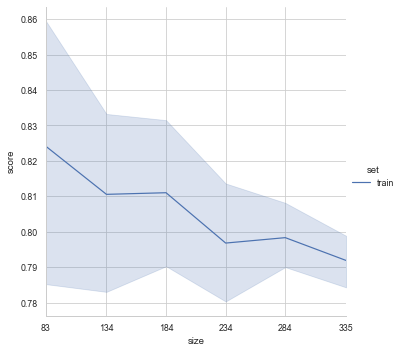

In [78]:
grid = seaborn.relplot(x="size", y="score", hue="set", kind="line", data=data)
grid.set(xticks=size, xlim=(min(size), max(size)))
grid.savefig("../results/cross.png", dpi = 150, bbox_inches = "tight")